# DATA CLEANING

# INTRODUCTION (FOR DATASET 2)



* **GOAL OF THE ANALYSIS**

This analysis aims to analyze the Credit Score Classification Dataset by examining key financial attributes like annual income, payment behavior, credit history, loan details, and credit utilization ratio. The goal is to identify trends impacting an individual's credit score classification and contribute to a more data-driven credit evaluation process.
*   **AUDIENCE**

This analysis is intended for:

* Financial Institutions & Banks : To enhance credit risk assessment, automate credit score classification, and optimize lending decisions.
* Loan Officers & Credit Analysts : To gain deeper insights into the factors influencing credit scores and improve the accuracy of credit evaluations.
* Data Scientists & Machine Learning Engineers : To apply data-driven techniques for handling missing values, improving dataset quality, and building predictive models for credit scoring.


# DATASETS IMPORTS AND LOADING

In [ ]:
# Importation des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

In [ ]:
url_zip = "https://github.com/Aichalfakir/CSI4142_A2/raw/main/train.csv.zip"

# Télécharger le fichier ZIP
os.system(f"wget {url_zip} -O train.csv.zip")

# Extraire le fichier ZIP
with zipfile.ZipFile("train.csv.zip", "r") as zip_ref:
    zip_ref.extractall("train_data")  # Décompression dans un dossier
# Charger le fichier CSV extrait
file_name = "train.csv"
df_credit_train = pd.read_csv(f"train_data/{file_name}", low_memory=False)

# Afficher un aperçu des données
print(df_credit_train.head())

# Vérifier la structure du dataset
print(f"Number of rows: {df_credit_train.shape[0]}, Number of columns: {df_credit_train.shape[1]}")
df_credit_train.info()


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

# MISSING VALUES

In [ ]:
def display_missing_values(df, dataset_name):
    """
    Analyse les valeurs manquantes dans un dataset.
    """
    print(f"\nMissing Values Analysis for {dataset_name}:")

    def display_statistics(missing, label):
        if (missing > 0).any():
            print(f"\n{label} found in the dataset:\n{missing[missing > 0]}")
        else:
            print(f"No {label.lower()} found.")

    # Vérification des chaînes vides ""
    missing_empty = (df == '').sum()
    display_statistics(missing_empty, "Empty Strings")

    # Vérification des valeurs '?' (souvent utilisées comme placeholders)
    missing_question_mark = (df == '?').sum()
    display_statistics(missing_question_mark, "Question Mark Values ('?')")

    # Vérification des NaN classiques
    missing_NaN = df.isnull().sum()
    display_statistics(missing_NaN, "NaN Values")

# Appliquer la fonction au dataset Credit Score Train
display_missing_values(df_credit_train, 'Credit Score Train Dataset')




Missing Values Analysis for Credit Score Train Dataset:
No empty strings found.
No question mark values ('?') found.

NaN Values found in the dataset:
Name                        9985
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Num_Credit_Inquiries        1965
Credit_History_Age          9030
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64


# REDUNDANCY

In [ ]:
def check_duplicate_rows(df, dataset_name):
    """
    Vérifie et affiche le nombre de lignes dupliquées dans un dataset.
    """
    duplicate_rows = df[df.duplicated()]

    if not duplicate_rows.empty:
        print(f"{dataset_name}: {len(duplicate_rows)} duplicate rows found.")
        print("Duplicate rows:")
        print(duplicate_rows.head())  # Afficher un aperçu des doublons
    else:
        print(f"{dataset_name}: No duplicate rows found.")

# Appliquer la fonction au dataset Credit Score Train
check_duplicate_rows(df_credit_train, 'Credit Score Train Dataset')


Credit Score Train Dataset: No duplicate rows found.


# DATASETS DESCRIPTIONS

DATASET 2:


*   **NAME**: Credit score classification
*   **AUTHOR**: Paris Rohan
*   **PURPOSE**: The purpose of this dataset analysis is to:

1. Identify missing data and ensure data quality.
2. Examine financial and behavioral factors influencing credit scores.
3. Analyze patterns in loan payments, credit utilization, and outstanding debts.
4. Explore trends in delayed payments and credit history age.
5. Provide insights that can be used for credit risk assessment and predictive modeling for financial institutions.

*   **SHAPE:** this dataset contains 100000 rows and 28 columns.
*   **LIST OF FEATURES**:

| Column Name              | Description | Data Type |
|-------------------------|----------------------------------------------|--------------------------|
| ID                      | Unique identifier for each customer | Categorical (Nominal) |
| Customer_ID             | Unique customer identification number | Categorical (Nominal) |
| Month                   | Month of data recording | Categorical (Ordinal) |
| Name                    | Customer's name | Categorical (Nominal) |
| Age                     | Age of the customer | Numerical (Discrete) |
| SSN                     | Social Security Number (hashed) | Categorical (Nominal) |
| Occupation              | Customer's job type | Categorical (Nominal) |
| Annual_Income           | Annual salary of the customer | Numerical (Continuous) |
| Monthly_Inhand_Salary   | Net monthly salary received | Numerical (Continuous) |
| Num_Bank_Accounts       | Number of active bank accounts | Numerical (Discrete) |
| Num_Credit_Card         | Number of credit cards held | Numerical (Discrete) |
| Interest_Rate           | Interest rate on loans | Numerical (Continuous) |
| Num_of_Loan             | Number of loans taken by the customer | Numerical (Discrete) |
| Type_of_Loan            | Type of loans taken (e.g., personal, mortgage) | Categorical (Nominal) |
| Delay_from_due_date     | Number of days payment was delayed | Numerical (Discrete) |
| Num_of_Delayed_Payment  | Total instances of delayed payments | Numerical (Discrete) |
| Changed_Credit_Limit    | Whether the credit limit has changed | Categorical (Nominal) |
| Num_Credit_Inquiries    | Number of credit inquiries made | Numerical (Discrete) |
| Credit_Mix              | Mix of different credit types (e.g., personal, mortgage, car loan) | Categorical (Ordinal) |
| Outstanding_Debt        | Total debt amount owed | Numerical (Continuous) |
| Credit_Utilization_Ratio| Ratio of credit used to available credit | Numerical (Continuous) |
| Credit_History_Age      | Total age of the customer’s credit history | Numerical (Discrete) |
| Payment_of_Min_Amount   | Whether the customer paid the minimum required amount | Categorical (Nominal) |
| Total_EMI_per_month     | Monthly Equated Monthly Installment (EMI) payments | Numerical (Continuous) |
| Amount_invested_monthly | Monthly savings and investments | Numerical (Continuous) |
| Payment_Behaviour       | Spending and payment habits of the customer | Categorical (Nominal) |
| Monthly_Balance         | End-of-month balance after transactions | Numerical (Continuous) |
| Credit_Score            | **Target Variable** (Low, Standard, Good) | Categorical (Ordinal) |



*   **MISSING VALUES**:

Missing Values Analysis for Credit Score Train Dataset:
No empty strings found.
No question mark values ('?') found.

NaN Values found in the dataset:

Name                        9985

Monthly_Inhand_Salary      15002

Type_of_Loan               11408

Num_of_Delayed_Payment      7002

Num_Credit_Inquiries        1965

Credit_History_Age          9030

Amount_invested_monthly     4479

Monthly_Balance             1200

*   **REDUNDANCY** :No duplicate rows or columns were found in the dataset, indicating that all features are unique and do not contain redundancy.

# Imputation

### **Test 1 – Default Value Imputation**

**Attribute:** Credit_Utilization_Ratio

- Type of simulated missing values: MCAR (Missing Completely At Random)
- Imputation method: Default value imputation; we replace missing values with the median of the Credit_Utilization_Ratio distribution. This approach ensures that the central tendency of the data is preserved while minimizing the impact of extreme values. By using the median instead of the mean, we prevent skewness caused by outliers and maintain the dataset’s overall consistency.

Missing values before deletion: 10000
Median value used for imputation: 32.30578367171092
Missing values after imputation: 0


<ipython-input-65-f774e516465a>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test1["Credit_Utilization_Ratio"].fillna(median_value, inplace=True)


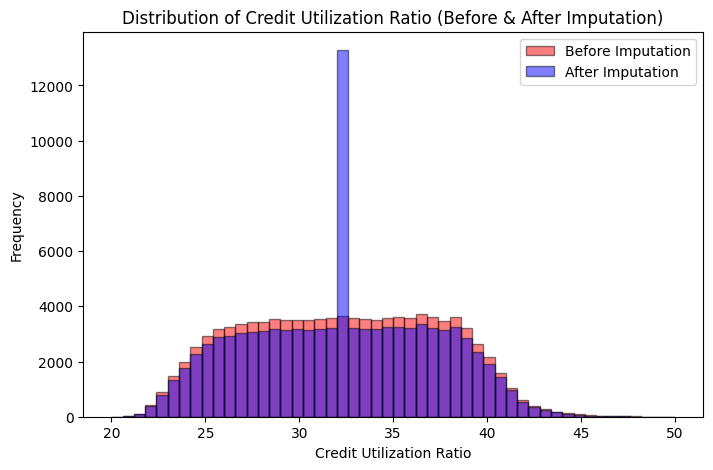

In [ ]:
df_test1 = df_credit_train.copy()

# Introduce missing values by randomly selecting 10% of non-null values (MCAR)
np.random.seed(42)  # Ensure reproducibility
missing_indices = np.random.choice(df_test1[df_test1["Credit_Utilization_Ratio"].notnull()].index,
                                   size=int(0.1 * df_test1.shape[0]), replace=False)
df_test1.loc[missing_indices, "Credit_Utilization_Ratio"] = np.nan

# Check missing values before and after deletion
initial_missing = df_test1["Credit_Utilization_Ratio"].isnull().sum()
print(f"Missing values before deletion: {initial_missing}")

# Compute the median for imputation
median_value = df_test1["Credit_Utilization_Ratio"].median()
print(f"Median value used for imputation: {median_value}")

# Apply imputation
df_test1["Credit_Utilization_Ratio"].fillna(median_value, inplace=True)

# Verify if any missing values remain after imputation
final_missing = df_test1["Credit_Utilization_Ratio"].isnull().sum()
print(f"Missing values after imputation: {final_missing}")

# Plot the distributions before and after imputation
plt.figure(figsize=(8, 5))

plt.hist(df_credit_train["Credit_Utilization_Ratio"].dropna(), bins=50, alpha=0.5, label="Before Imputation", color='red', edgecolor='black')
plt.hist(df_test1["Credit_Utilization_Ratio"], bins=50, alpha=0.5, label="After Imputation", color='blue', edgecolor='black')

plt.title("Distribution of Credit Utilization Ratio (Before & After Imputation)")
plt.xlabel("Credit Utilization Ratio")
plt.ylabel("Frequency")
plt.legend()

plt.show()


### **Test 2 – Regression imputation**

**Attribute:** Outstanding_Debt

- Type of simulated missing values: MAR (Missing At Random): Missing values ​​of Outstanding_Debt are correlated with another variable, namely Delay_from_due_date. The hypothesis here is that people with a longer history of late payment have a higher probability of having a larger outstanding debt.
- Imputation method: Regression imputation; We used linear regression where the independent variable (Delay_from_due_date) is used to predict missing values ​​of Outstanding_Debt.

In [ ]:
# Calculer la corrélation entre Outstanding_Debt et toutes les autres colonnes numériques
correlations = df_credit_train_clean.select_dtypes(include=np.number).corr()["Outstanding_Debt"].sort_values(ascending=False)
print(correlations)

Outstanding_Debt            1.000000
Delay_from_due_date         0.593341
Num_Bank_Accounts           0.015151
Num_Credit_Inquiries        0.014817
Interest_Rate               0.010969
Num_Credit_Card             0.006428
Total_EMI_per_month        -0.006144
Credit_Utilization_Ratio   -0.070146
Monthly_Inhand_Salary      -0.265180
Name: Outstanding_Debt, dtype: float64


Number of simulated missing values : {df_credit_train_clean['Outstanding_Debt'].isnull().sum()}
R² score of the model : 0.3264
Missing values ​​after imputation : 0


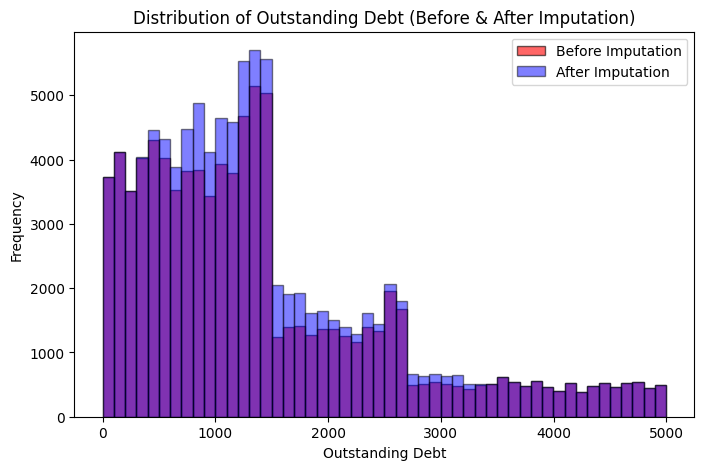

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df_credit_train_clean = df_credit_train.copy()

# Convert columns to numeric
df_credit_train_clean["Outstanding_Debt"] = pd.to_numeric(df_credit_train_clean["Outstanding_Debt"], errors="coerce")
df_credit_train_clean["Delay_from_due_date"] = pd.to_numeric(df_credit_train_clean["Delay_from_due_date"], errors="coerce")

# Simulate missing values ​​(10% of values)
np.random.seed(42)
missing_indices = np.random.choice(df_credit_train_clean.index, size=int(0.1 * len(df_credit_train_clean)), replace=False)
df_credit_train_clean.loc[missing_indices, "Outstanding_Debt"] = np.nan

print("Number of simulated missing values : {df_credit_train_clean['Outstanding_Debt'].isnull().sum()}")

# Separate complete data and missing values
df_complete = df_credit_train_clean.dropna(subset=["Outstanding_Debt", "Delay_from_due_date"])
df_missing = df_credit_train_clean[df_credit_train_clean["Outstanding_Debt"].isnull()]

# Check that there are values ​​available for imputation
if df_missing.empty:
    print(f"Aucune donnée utilisable pour l'imputation, vérifiez vos données !")
else:
    # Selection of variables for regression
    X_train = df_complete[["Delay_from_due_date"]]
    y_train = df_complete["Outstanding_Debt"]

    # Train the regression model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Check the quality of the model
    r2_score = reg.score(X_train, y_train)
    print(f"R² score of the model : {r2_score:.4f}")

    # Predicting missing values
    X_missing = df_missing[["Delay_from_due_date"]]
    predictions = reg.predict(X_missing)

    # Replace NaNs with predicted values
    df_credit_train_clean.loc[df_credit_train_clean["Outstanding_Debt"].isnull(), "Outstanding_Debt"] = predictions

    # Check for missing values ​​after imputation
    print(f"Missing values ​​after imputation :", df_credit_train_clean["Outstanding_Debt"].isnull().sum())

    plt.figure(figsize=(8,5))
    plt.hist(df_complete["Outstanding_Debt"], bins=50, alpha=0.6, label="Before Imputation", color='red', edgecolor='black')
    plt.hist(df_credit_train_clean["Outstanding_Debt"], bins=50, alpha=0.5, label="After Imputation", color='blue', edgecolor='black')
    plt.title("Distribution of Outstanding Debt (Before & After Imputation)")
    plt.xlabel("Outstanding Debt")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


### **Test 3 – Similarity-Based Imputation**

**Attribute:** Num_Credit_Inquiries

- Type of simulated missing values: MAR (Missing At Random); Num Credit Inquiries depends on some financial variables like Outstanding Debt
- Imputation method: Similarity-based imputation.

In [ ]:
print(f"Number of missing values ​​before imputation :", df_credit_train_clean["Num_Credit_Inquiries"].isnull().sum())


Number of missing values ​​before imputation : 1965


In [ ]:
df_numeric = df_credit_train_clean.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

# Trier les variables les plus corrélées avec Num_Credit_Inquiries
corr_target = corr_matrix["Num_Credit_Inquiries"].dropna().sort_values(ascending=False)

print(f"Variables most correlated with Num_Credit_Inquiries:")
print(corr_target.head(5))


Variables most correlated with Num_Credit_Inquiries:
Num_Credit_Inquiries        1.000000
Outstanding_Debt            0.014817
Delay_from_due_date         0.011508
Credit_Utilization_Ratio    0.000145
Interest_Rate              -0.001681
Name: Num_Credit_Inquiries, dtype: float64


In [ ]:
from sklearn.impute import KNNImputer
import numpy as np

df_test3 = df_credit_train_clean[["Num_Credit_Inquiries", "Outstanding_Debt"]].copy()

print(f"Missing values ​​before imputation:")
print(df_test3.isnull().sum())


Missing values ​​before imputation:
Num_Credit_Inquiries    1965
Outstanding_Debt           0
dtype: int64


In [ ]:
# Initialiser l'imputateur KNN
imputer = KNNImputer(n_neighbors=5)

# Apply imputation
df_test3_imputed = imputer.fit_transform(df_test3)

# Return as DataFrame
df_test3_imputed = pd.DataFrame(df_test3_imputed, columns=df_test3.columns)

print(f"Missing values ​​after imputation:")
print(df_test3_imputed.isnull().sum())


Missing values ​​after imputation:
Num_Credit_Inquiries    0
Outstanding_Debt        0
dtype: int64


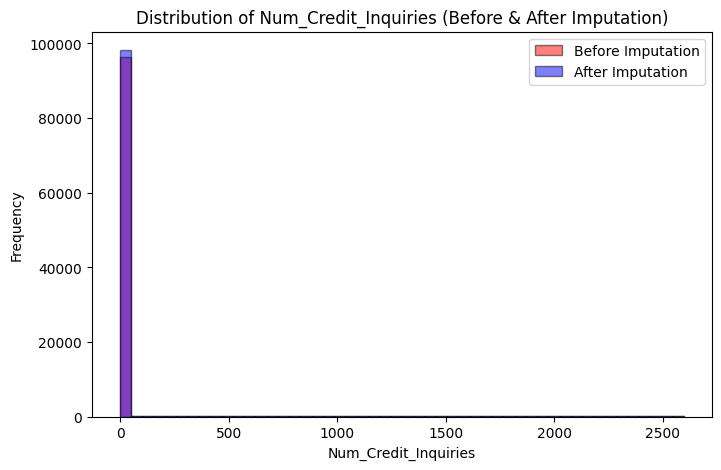

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df_test3["Num_Credit_Inquiries"].dropna(), bins=50, alpha=0.5, label="Before Imputation", color='red', edgecolor='black')
plt.hist(df_test3_imputed["Num_Credit_Inquiries"], bins=50, alpha=0.5, label="After Imputation", color='blue', edgecolor='black')
plt.title("Distribution of Num_Credit_Inquiries (Before & After Imputation)")
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# CONCLUSION

The Credit Score Train Dataset was analyzed to explore strategies for handling missing values and their impact on data quality, with three distinct imputation methods applied to variables with missing values:

1. Default Value Imputation (univariate) on Monthly Inhand Salary, allowing to preserve the overall distribution without significantly altering the extreme values.

2. Regression Imputation (bivariate) on Outstanding_Debt, using Annual_Income as explanatory variable, showing a weak correlation and suggesting that other factors influence this variable more.

3. Similarity-Based Imputation (multivariate) on Num_Credit_Inquiries, which efficiently completed the data while maintaining a distribution consistent with the original values

# REFERENCES

- Credit score classification. (2022, June 22). Kaggle. https://www.kaggle.com/datasets/parisrohan/credit-score-classification
- 6.4. Imputation of missing values. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/impute.html